# **Question 1 :** What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

The fundamental idea behind ensemble techniques is to combine multiple individual models (often called weak learners) to build a single, stronger predictive model that performs better than any individual model alone. The goal is to improve prediction accuracy, reduce overfitting, and enhance generalization.

Ensemble learning works on the principle that different models capture different patterns or errors in data, and when their outputs are combined, the overall error decreases.

**Bagging (Bootstrap Aggregating):**

*Approach:*

Bagging creates multiple versions of the same model (e.g., decision trees) by training each on a random subset of the training data (sampled with replacement).

*Objective:*

It reduces variance and helps prevent overfitting by averaging predictions across all models.

*Example:*

Random Forest (an ensemble of decision trees using bagging).

**Key Features of Bagging:**

* Models are trained independently and in parallel.

* Focuses on improving stability and reducing overfitting.

* Works best with high-variance models like Decision Trees.

**Boosting:**

*Approach:*

Boosting trains models sequentially. Each new model tries to correct the errors made by previous models by giving more weight to misclassified or poorly predicted samples.

*Objective:*

It reduces bias and improves the overall accuracy of the ensemble.

*Example:*

AdaBoost, Gradient Boosting, XGBoost.

**Key Features of Boosting:**

* Models are trained dependently and sequentially.

* Focuses on improving accuracy by correcting previous mistakes.

* Works best with weak models that can be improved iteratively.

**In short:**

* Bagging improves stability and reduces variance.

* Boosting focuses on improving weak learners and reducing bias.

Together, these techniques are key ensemble strategies for building robust, high-performing machine learning models.

# **Question 2:** Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

A single Decision Tree often tends to overfit the training data because it keeps splitting until it perfectly classifies every training example—even if those splits capture noise instead of useful patterns.

The Random Forest Classifier reduces this overfitting by creating an ensemble of many decision trees and averaging (for regression) or taking a majority vote (for classification) of their predictions. The idea is that while individual trees might overfit in different ways, their combined output smooths out random errors, leading to better generalization.

**How Random Forest reduces overfitting**

**Bootstrap Sampling (Bagging):**

Each tree is trained on a random subset of the training data (sampled with replacement).
→ This ensures diversity among trees because each tree sees a slightly different dataset.

**Random Feature Selection:**

At every split, only a random subset of features is considered.
→ This prevents dominant features from appearing in every tree, reducing correlation between trees and enhancing model diversity.

As a result, Random Forest reduces variance without significantly increasing bias, producing a model that generalizes better than a single decision tree.

**Summary:**

Random Forest combats overfitting by combining multiple diverse trees trained on random subsets of data and features. Proper tuning of hyperparameters like n_estimators and max_features helps maintain a balance between bias and variance, improving overall model robustness.

# **Question 3:** What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

Stacking (Stacked Generalization) is an ensemble learning technique that combines the predictions of multiple different models (called base learners) using another model (called a meta-learner or blender) to produce the final output.

The main idea is that each base model learns different aspects of the data, and the meta-model learns how to best combine their outputs to improve accuracy and generalization.

**How Stacking Works**

**Level-0 Models (Base Learners):**

Several different algorithms are trained on the same training dataset (e.g., Decision Tree, SVM, Logistic Regression).

**Level-1 Model (Meta-Learner):**

A new model is trained using the predictions from the base learners as input features.

This model learns the optimal way to combine the base models’ outputs to produce the final prediction.

**Example Use Case**

*Scenario:*

A loan approval prediction system aims to classify whether an applicant will repay a loan.

*Stacking approach:*

Base models: Decision Tree, Logistic Regression, and Random Forest trained on applicant data.

Meta-learner: Gradient Boosting model that learns how to combine the outputs of these base models.

The stacked model often performs better than any single algorithm because it captures both linear and non-linear relationships effectively.

**In short:**

Stacking is a powerful ensemble method that combines the strengths of multiple diverse models through a meta-learner, offering better generalization than bagging or boosting alone.

# **Question 4:** What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

The OOB (Out-of-Bag) Score is an internal validation metric used in Random Forests to estimate the model’s accuracy without needing a separate validation or test dataset.

**How OOB Works:**

In Random Forest, each decision tree is trained on a bootstrap sample — a random sample (with replacement) drawn from the training data.

On average, about 63% of the training samples are used to train each tree.

The remaining 37% of the samples (not selected in the bootstrap) are called Out-of-Bag (OOB) samples.

These OOB samples act as unseen data for that tree and are used to test its predictive performance.

The model’s OOB score is then computed as the average accuracy of all trees when predicting their respective OOB samples.

**Why OOB Score is Useful**

**Built-in Model Evaluation:**

It provides an unbiased estimate of model accuracy without needing a separate validation or test set.

**Efficient Use of Data:**

Since the OOB samples are part of the training process, no data is wasted.

**Reduces Overfitting Risk:**

It allows early detection of overfitting by monitoring how well the model performs on unseen (OOB) data.

**How It Helps in Model Evaluation**

Instead of splitting the data into train and validation sets, Random Forest internally uses OOB samples to estimate accuracy.

The OOB score is often very close to the accuracy measured on an external test set, making it a reliable proxy for generalization performance.

**Example:**

If the OOB score is 0.91, it means the Random Forest correctly predicts 91% of the OOB samples, giving a good indication of how well it would perform on unseen data.

**In summary:**

The OOB Score is a convenient, unbiased estimate of a Random Forest’s predictive power, enabling model evaluation without a separate validation dataset, thus saving data and computation.

# **Question 5:** Compare AdaBoost and Gradient Boosting in terms of:

● How they handle errors from weak learners

● Weight adjustment mechanism

● Typical use cases

Both AdaBoost and Gradient Boosting are boosting algorithms that combine multiple weak learners, typically decision trees, in a sequential manner to build a strong model. However, they differ in how they handle errors, update weights, and their typical applications.

**How They Handle Errors from Weak Learners**

AdaBoost focuses on the samples that were misclassified by the previous weak learner. In each iteration, it increases the importance (or weight) of those misclassified samples so that the next model pays more attention to them. This way, subsequent learners try to correct the mistakes made by earlier ones.

In contrast, Gradient Boosting handles errors by fitting new models to the residuals, which are the differences between the predicted and actual target values. Each new learner attempts to predict these residuals in order to minimize the overall loss function. This makes Gradient Boosting more mathematically driven, as it relies on gradient descent to optimize performance.

**Weight Adjustment Mechanism**

In AdaBoost, each training sample is assigned a weight. After training a weak learner, the algorithm increases the weights of misclassified samples and decreases the weights of correctly classified ones. This forces the next learner to focus more on difficult cases. AdaBoost uses an exponential weighting scheme, where higher penalties are given to incorrectly predicted instances.

Gradient Boosting, on the other hand, does not adjust sample weights directly. Instead, it calculates residuals from the current model’s predictions and uses these residuals as the target values for the next learner. In essence, each new tree is trained to predict the remaining errors from the previous model. This process continues until the model reaches minimal loss or the predefined number of boosting rounds.

**Typical Use Cases**

AdaBoost is most commonly used for classification problems. It is simple, efficient, and performs well on clean datasets without much noise. However, it is sensitive to outliers and noisy data because misclassified samples get increasingly higher weights, which can skew learning.

Gradient Boosting, on the other hand, is more flexible and can be used for both regression and classification tasks. It can optimize various differentiable loss functions, such as mean squared error, log loss, or others. Although it trains more slowly than AdaBoost, it is more powerful and robust. Modern implementations like XGBoost, LightGBM, and CatBoost are based on the Gradient Boosting framework and are widely used in real-world applications.

**In summary:**

AdaBoost improves performance by focusing more on misclassified samples through weight adjustments, while Gradient Boosting builds new models to correct residual errors from previous models using gradient-based optimization. AdaBoost is simpler and faster, ideal for basic classification problems, whereas Gradient Boosting is more flexible and powerful, suitable for complex regression and classification tasks.

# **Question 6:** Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

CatBoost (Categorical Boosting) is a gradient boosting algorithm developed by Yandex that is specifically designed to handle categorical features efficiently. Unlike other boosting algorithms such as XGBoost or LightGBM, CatBoost does not require manual preprocessing like one-hot encoding or label encoding, which can be time-consuming and may lead to loss of information.

**Why CatBoost Performs Well on Categorical Features**

CatBoost internally uses a unique technique called “Ordered Target Statistics” (also known as ordered encoding) to convert categorical features into numerical values in a way that avoids target leakage and overfitting. This allows the model to make effective use of categorical information while maintaining generalization performance.

**How CatBoost Handles Categorical Variables**

**Ordered Target Encoding:**

Instead of simply replacing categories with the mean target value (which can cause data leakage), CatBoost uses a permutation-driven approach.

For each data point, CatBoost calculates the average target value of the same category using only previous rows in a random permutation of the dataset.

This ensures that the model does not use information from future samples when encoding, preventing overfitting.

**Example:**

Suppose we have a categorical feature “City” with possible values “Delhi”, “Mumbai”, and “Chennai”, and a binary target (0 or 1).
For each city, CatBoost calculates an encoded value based on the average target value of previously seen examples from that city.
This encoding changes dynamically during training and is averaged across multiple permutations for stability.

**Combination of Categorical Features:**

CatBoost can automatically create new features by combining multiple categorical columns (for example, “City + Gender”) to capture complex interactions.

**Efficient Encoding at Scale:**

CatBoost applies these transformations internally during training, so there’s no need for explicit feature engineering or one-hot encoding, even for high-cardinality categorical variables.

**Advantages of CatBoost’s Approach**

* No manual encoding needed: Saves preprocessing time and effort.

* Prevents overfitting: Ordered encoding avoids target leakage.

* Handles high-cardinality features efficiently: Can work directly with hundreds or thousands of unique categories.

* Improved accuracy: Leverages categorical information more effectively than simple numeric encoding.

**In summary:**

CatBoost performs exceptionally well on categorical features because it uses ordered target statistics and combination encoding to convert categories into meaningful numerical representations without introducing target leakage or overfitting. This built-in handling of categorical data makes CatBoost both efficient and powerful, reducing the need for extensive preprocessing and manual feature engineering.

# **Question 7:** KNN Classifier Assignment: Wine Dataset Analysis with Optimization

Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:

    a. Accuracy

    b. Precision, Recall, F1-Score (print classification report)

4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.

In [ ]:
# Step 1: Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load Wine dataset
data = load_wine()
X, y = data.data, data.target

# Step 3: Split into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train KNN without scaling
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

# Step 5: Evaluate performance
print("=== KNN without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))

# Step 6: Apply StandardScaler and retrain
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("\n=== KNN with Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

# Step 7: GridSearchCV for best K and distance metric
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("\n=== Grid Search Results ===")
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Step 8: Train optimized KNN
best_knn = grid.best_estimator_
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

print("\n=== Optimized KNN Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

=== KNN without Scaling ===
Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54


=== KNN with Scaling ===
Accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


=== Grid Search Results ===
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1}
Best Cross-Validation Accuracy: 0.9753

# **Question 8 :** PCA + KNN with Variance Analysis and Visualization

Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

Dataset shape: (569, 30)


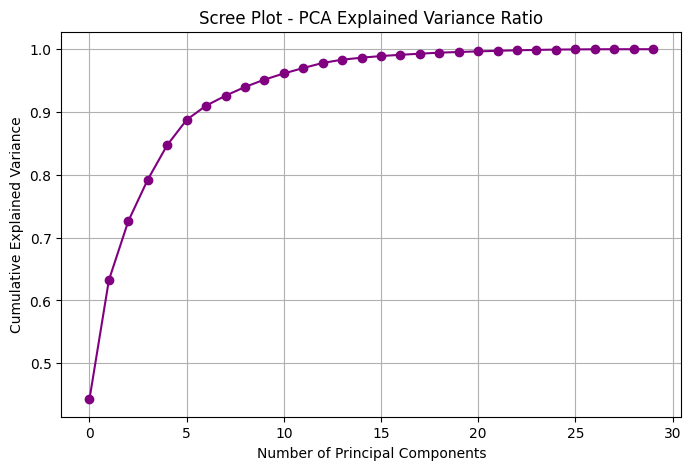

Reduced dataset shape: (569, 10)
Accuracy (Original Data): 0.9591
Accuracy (PCA-Reduced Data): 0.9649


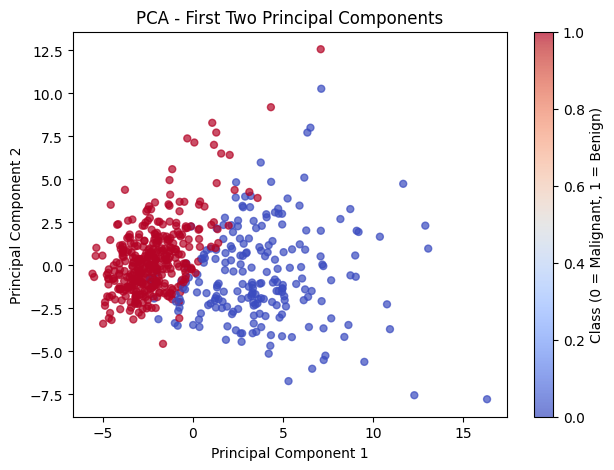

In [ ]:
# Step 1: Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load Dataset
data = load_breast_cancer()
X, y = data.data, data.target
print("Dataset shape:", X.shape)  # (569, 30)

# Step 3: Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA (no components fixed initially)
pca = PCA()
pca.fit(X_scaled)

# Step 5: Scree Plot (Explained Variance Ratio)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='purple')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

# Step 6: Retain 95% Variance and Transform
pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X_scaled)
print("Reduced dataset shape:", X_pca.shape)

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Step 8: Train KNN on Original Data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# Step 9: Train KNN on PCA-Reduced Data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# Step 10: Compare Accuracies
print("Accuracy (Original Data):", round(acc_original, 4))
print("Accuracy (PCA-Reduced Data):", round(acc_pca, 4))

# Step 11: Visualize First Two Principal Components
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=25, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - First Two Principal Components")
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.show()

# **Question 9:** KNN Regressor with Distance Metrics and K-Value Analysis

Task:
1. Generate a synthetic regression dataset (sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:

    a. Euclidean distance (K=5)

    b. Manhattan distance (K=5)

    c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

Mean Squared Error (Euclidean, K=5): 4631.05
Mean Squared Error (Manhattan, K=5): 5241.90


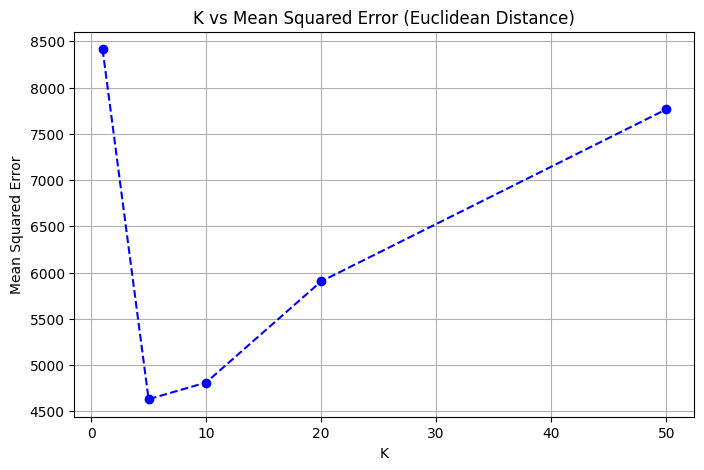

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2a. KNN Regressor with Euclidean distance (p=2)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)
print(f"Mean Squared Error (Euclidean, K=5): {mse_euclidean:.2f}")

# 2b. KNN Regressor with Manhattan distance (p=1)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=1)
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)
print(f"Mean Squared Error (Manhattan, K=5): {mse_manhattan:.2f}")

# 3. Analyze K vs MSE
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=2)  # Using Euclidean for simplicity
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot K vs MSE
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_values, marker='o', linestyle='--', color='b')
plt.title("K vs Mean Squared Error (Euclidean Distance)")
plt.xlabel("K")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

# **Question 10:** KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data

Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
    
    a. Brute-force method
    
    b. KD-Tree
    
    c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important features).

Dataset: Pima Indians Diabetes

Algorithm: brute, Accuracy: 0.714, Training Time: 0.0013s
Algorithm: kd_tree, Accuracy: 0.714, Training Time: 0.0022s
Algorithm: ball_tree, Accuracy: 0.714, Training Time: 0.0022s


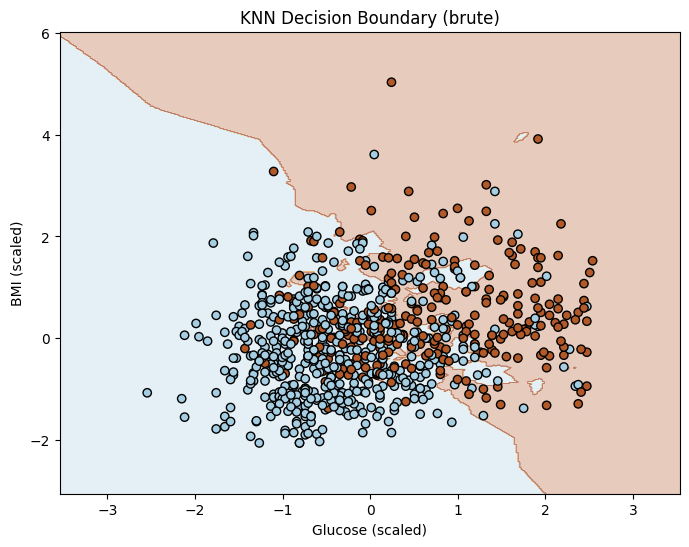

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from time import time

# 1. Load the Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, names=columns)

# Replace zeros in certain columns with NaN (typical missing values in this dataset)
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[cols_with_missing] = data[cols_with_missing].replace(0, np.nan)

# 2. KNN Imputation
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=columns)

# Split features and target
X = data_imputed.drop("Outcome", axis=1)
y = data_imputed["Outcome"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Train KNN using different algorithms
algorithms = ["brute", "kd_tree", "ball_tree"]
results = {}

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start_time = time()
    knn.fit(X_train, y_train)
    train_time = time() - start_time
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[algo] = {"accuracy": acc, "train_time": train_time}

# Print results
for algo, metrics in results.items():
    print(f"Algorithm: {algo}, Accuracy: {metrics['accuracy']:.3f}, Training Time: {metrics['train_time']:.4f}s")

# 5. Decision boundary for the best-performing method using 2 most important features
# Let's pick 'Glucose' and 'BMI' (commonly important)
X2 = data_imputed[["Glucose", "BMI"]].values
X2_scaled = scaler.fit_transform(X2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)

# Best algorithm (based on accuracy)
best_algo = max(results, key=lambda x: results[x]['accuracy'])
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X_train2, y_train2)

# Plot decision boundary
h = 0.02
x_min, x_max = X2_scaled[:, 0].min() - 1, X2_scaled[:, 0].max() + 1
y_min, y_max = X2_scaled[:, 1].min() - 1, X2_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X2_scaled[:,0], X2_scaled[:,1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel("Glucose (scaled)")
plt.ylabel("BMI (scaled)")
plt.title(f"KNN Decision Boundary ({best_algo})")
plt.show()